In [104]:
import numpy as np
from astropy.io import fits 
import matplotlib.pyplot as plt
import astropy.constants as c
import astropy.units as u
import scipy.constants as spc
import pandas as pd
from astropy.table import QTable


D_fits=fits.open('D_gaia_2mass.fits')
data=D_fits[1].data



plx=data['parallax']
plx_error=data['parallax_error']
astroerror=data['astrometric_excess_noise']
index=(astroerror<1)&(plx>0)&(np.abs(plx_error/plx)<0.1)
data=data[index]
pmra=data['pmra']
pmdec=data['pmdec']
pmra_error=data['pmra_error']
pmdec_error=data['pmdec_error']

index=(np.abs(pmra_error/pmra)<0.1)&(np.abs(pmdec_error/pmdec)<0.15)
data=data[index]

pmra_error=data['pmra_error']
pmdec_error=data['pmdec_error']
ra=data['ra']
dec=data['dec']
pmra=data['pmra']
pmdec=data['pmdec']
plx=data['parallax']
#plx_std=np.std(plx)
#plx_mean=np.mean(plx)
distance=1000/plx
#distance_std=np.std(distance)
#distance_mean=np.mean(distance)
#pmra_std=np.std(pmra)
#pmra_mean=np.mean(pmra)
#pmdec_std=np.std(pmdec)
#pmdec_mean=np.mean(pmdec)
#index=(np.abs(pmra_error/pmra)<0.1)&(np.abs(pmdec_error/pmdec)<0.1)&(distance_mean+1*distance_std>distance)&(distance_mean-1*distance_std<distance)\
#     &(pmdec_mean+1*pmdec_std>pmdec)&(pmdec_mean-1*pmdec_std<pmdec)&(pmra_mean-1*pmra_std<pmra)&(pmra_mean+1*pmra_std>pmra)

#distance_25=np.quantile(distance,0.25)
#distance_75=np.quantile(distance,0.75)
distance_25=np.quantile(distance,0.0668)
distance_75=np.quantile(distance,0.932)
pmra_25=np.quantile(pmra,0.0668)
pmra_75=np.quantile(pmra,0.932)
pmdec_25=np.quantile(pmdec,0.0668)
pmdec_75=np.quantile(pmdec,0.932)

index=(np.abs(pmra_error/pmra)<0.1)&(np.abs(pmdec_error/pmdec)<0.1)&(distance>distance_25)&(distance<distance_75)\
     &(pmra>pmra_25)&(pmra<pmra_75)&(pmdec>pmdec_25)&(pmdec<pmdec_75)
data=data[index]




plx=data['parallax']
distance=1000/np.abs(plx)
ra=data['ra']
dec=data['dec']
pmra=data['pmra']
pmdec=data['pmdec']




print(len(distance))

352


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less


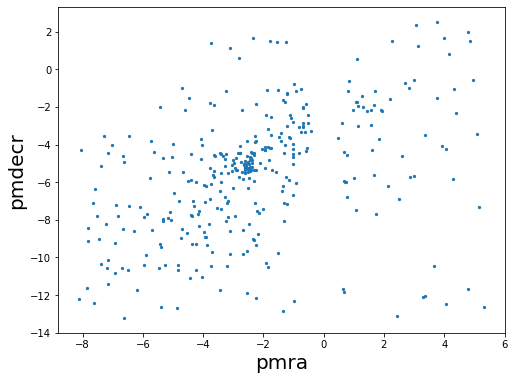

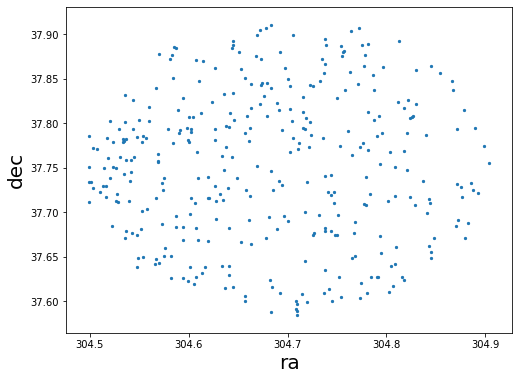

In [105]:
font=20

plt.figure(figsize=(8,6))
plt.scatter(pmra,pmdec,s=5)
plt.xlabel('pmra',fontsize=font)
plt.ylabel('pmdecr',fontsize=font)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(ra,dec,s=5)
plt.xlabel('ra',fontsize=font)
plt.ylabel('dec',fontsize=font)
plt.show()

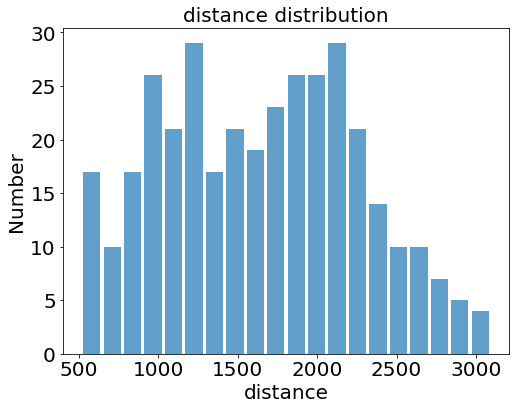

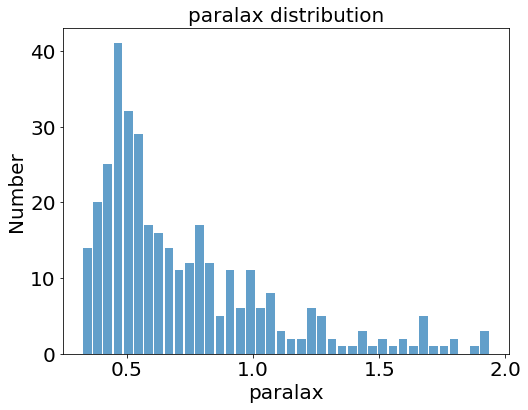

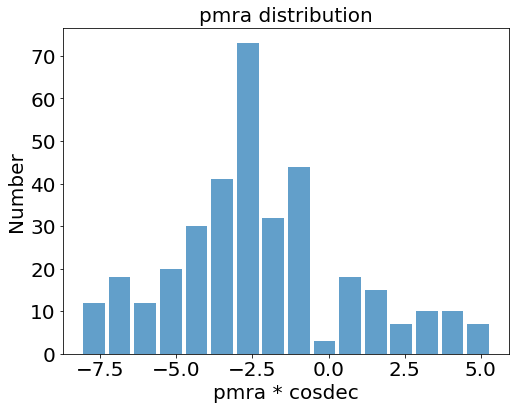

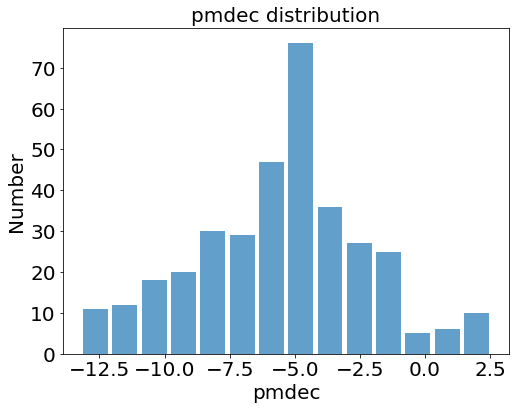

In [106]:
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(x=distance, bins=20,alpha=0.7, rwidth=0.85)
plt.title('distance distribution',fontsize=font)
plt.xlabel('distance',fontsize=font)
plt.ylabel('Number',fontsize=font)
plt.tick_params(labelsize=font)
plt.show()

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(x=plx, bins=40,alpha=0.7, rwidth=0.85)
plt.title('paralax distribution',fontsize=font)
plt.xlabel('paralax',fontsize=font)
plt.ylabel('Number',fontsize=font)
plt.tick_params(labelsize=font)
plt.show()

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(x=pmra, bins='auto',alpha=0.7, rwidth=0.85)
plt.title('pmra distribution',fontsize=font)
plt.xlabel('pmra * cosdec',fontsize=font)
plt.ylabel('Number',fontsize=font)
plt.tick_params(labelsize=font)
plt.show()

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(x=pmdec, bins='auto',alpha=0.7, rwidth=0.85)
plt.title('pmdec distribution',fontsize=font)
plt.xlabel('pmdec',fontsize=font)
plt.ylabel('Number',fontsize=font)
plt.tick_params(labelsize=font)
plt.show()